In [88]:
#GAN CODE: DONT RUN THIS FIRST. SEE BELOW

import torch
import torch.nn
import torch.nn.functional as nn
import torch.autograd as autograd
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from torch.autograd import Variable
#from tensorflow.examples.tutorials.mnist import input_data

model = "vgan"
#mnist = input_data.read_data_sets('../../MNIST_data', one_hot=True)

mb_size = 50
z_dim = 4
X_dim = np.shape(sim_out)[1]#mnist.train.images.shape[1]
#y_dim = #mnist.train.labels.shape[1]
h_dim = 100
cnt = 0
lr = 1e-4
k = 3
n_iters = 20000
p_int = 10
sample_size = 200

if (model == "vgan"):
    ones_label = Variable(torch.ones(mb_size))
    zeros_label = Variable(torch.zeros(mb_size))
    

samples = np.empty((int(n_iters/p_int)+1,sample_size,X_dim))

G = torch.nn.Sequential(
    torch.nn.Linear(z_dim, h_dim),
    torch.nn.ReLU(),
    torch.nn.Linear(h_dim, X_dim)
)

if(model=="vgan"):
    D = torch.nn.Sequential(
        torch.nn.Linear(X_dim, h_dim),
        torch.nn.ReLU(),
        torch.nn.Linear(h_dim,1),
        torch.nn.Sigmoid()
    )



if(model=="wgan"):
    D = torch.nn.Sequential(
        torch.nn.Linear(X_dim, h_dim),
        torch.nn.ReLU(),
        torch.nn.Linear(h_dim, 1),
    )


def reset_grad():
    G.zero_grad()
    D.zero_grad()


G_solver = optim.RMSprop(G.parameters(), lr=lr)
D_solver = optim.RMSprop(D.parameters(), lr=lr)


for it in range(n_iters):
    for _ in range(k):
        # Sample data
        z = Variable(torch.randn(mb_size, z_dim))
        X =  multivariateGaussianMixture(pi, centroids, covmat, n_samples = mb_size)
        X = Variable(torch.Tensor(X))

        # Dicriminator forward-loss-backward-update
        G_sample = G(z)
        D_real = D(X)
        D_fake = D(G_sample)
        
        if (model == "wgan"):
            D_loss = -(torch.mean(D_real) - torch.mean(D_fake))

        if(model == "vgan"):
            D_loss_real = nn.binary_cross_entropy(D_real, ones_label)
            D_loss_fake = nn.binary_cross_entropy(D_fake, zeros_label)
            D_loss = D_loss_real + D_loss_fake
            
        D_loss.backward()
        D_solver.step()

        # Weight clipping
        if(model=="wgan"):
            for p in D.parameters():
                p.data.clamp_(-0.05, 0.05)

        # Housekeeping - reset gradient
        reset_grad()

    # Generator forward-loss-backward-update
    
    z = Variable(torch.randn(mb_size, z_dim))

    G_sample = G(z)
    D_fake = D(G_sample)
    
    if(model == "vgan"):
        G_loss = nn.binary_cross_entropy(D_fake, ones_label)
    
    if(model == "wgan"):
        G_loss = -torch.mean(D_fake)

    G_loss.backward()
    G_solver.step()

    # Housekeeping - reset gradient
    reset_grad()

    # Print and plot every now and then
    if it % p_int == 0:
        if it % (100*p_int) == 0:
            print('Iter-{}; D_loss: {}; G_loss: {}'
                  .format(it, D_loss.data.numpy(), G_loss.data.numpy()))

        samples[int(it/p_int),:,:] = G(Variable(torch.randn(sample_size, z_dim))).data.numpy()
'''
        fig = plt.figure(figsize=(4, 4))
        gs = gridspec.GridSpec(4, 4)
        gs.update(wspace=0.05, hspace=0.05)

        for i, sample in enumerate(samples):
            ax = plt.subplot(gs[i])
            plt.axis('off')
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.set_aspect('equal')
            plt.scatter(samples[int(it/1000),:,1], samples[int(it/1000),:,2])

        if not os.path.exists('out/'):
            os.makedirs('out/')

        plt.savefig('out/{}.png'.format(str(cnt).zfill(3)), bbox_inches='tight')
        cnt += 1
        plt.close(fig)
'''

Iter-0; D_loss: [ 1.25996113]; G_loss: [ 0.76480675]
Iter-1000; D_loss: [ 0.26862523]; G_loss: [ 2.23664498]
Iter-2000; D_loss: [ 0.90197122]; G_loss: [ 1.82319474]
Iter-3000; D_loss: [ 1.09971094]; G_loss: [ 1.38281369]
Iter-4000; D_loss: [ 1.06690836]; G_loss: [ 1.12580168]
Iter-5000; D_loss: [ 0.8757453]; G_loss: [ 1.15345275]
Iter-6000; D_loss: [ 0.97846699]; G_loss: [ 1.20913684]
Iter-7000; D_loss: [ 0.85926521]; G_loss: [ 1.08929384]
Iter-8000; D_loss: [ 0.96689844]; G_loss: [ 1.1349901]
Iter-9000; D_loss: [ 1.04210639]; G_loss: [ 1.0770824]
Iter-10000; D_loss: [ 0.99880898]; G_loss: [ 1.20427799]
Iter-11000; D_loss: [ 1.21922374]; G_loss: [ 0.94828051]
Iter-12000; D_loss: [ 0.96883869]; G_loss: [ 1.05266798]
Iter-13000; D_loss: [ 1.1988678]; G_loss: [ 0.9684608]
Iter-14000; D_loss: [ 1.11737621]; G_loss: [ 1.00174999]
Iter-15000; D_loss: [ 1.19435942]; G_loss: [ 0.97493333]
Iter-16000; D_loss: [ 1.09563613]; G_loss: [ 1.06821716]
Iter-17000; D_loss: [ 1.11036515]; G_loss: [ 0.89

"\n        fig = plt.figure(figsize=(4, 4))\n        gs = gridspec.GridSpec(4, 4)\n        gs.update(wspace=0.05, hspace=0.05)\n\n        for i, sample in enumerate(samples):\n            ax = plt.subplot(gs[i])\n            plt.axis('off')\n            ax.set_xticklabels([])\n            ax.set_yticklabels([])\n            ax.set_aspect('equal')\n            plt.scatter(samples[int(it/1000),:,1], samples[int(it/1000),:,2])\n\n        if not os.path.exists('out/'):\n            os.makedirs('out/')\n\n        plt.savefig('out/{}.png'.format(str(cnt).zfill(3)), bbox_inches='tight')\n        cnt += 1\n        plt.close(fig)\n"

In [1]:
#THIS CALCULATES l2 distnace of samples from distribution mean(first moment)

n,ns, d = np.shape(samples)
l2_wgan = np.empty((n-2))

for i in range(n-2):
    avg = samples[i,:,:].mean(0)
    l2_wgan[i] = np.linalg.norm(avg - gmean,2)


NameError: name 'np' is not defined

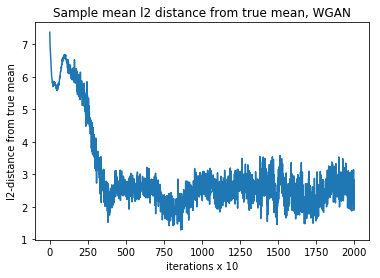

In [90]:
plt.xlabel('iterations x 10')
plt.ylabel('l2-distance from true mean')
plt.title('Sample mean l2 distance from true mean, WGAN')
plt.plot(range(n-2),l2_wgan)




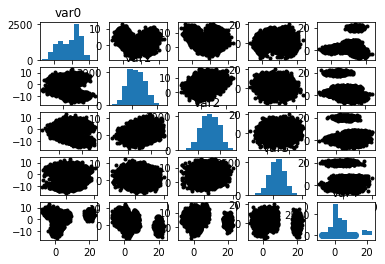

In [16]:
#DO THIS FIRST: MAKE SURE multivariateGaussianMixture contains the distributio u want to work with

import numpy as np
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

def pair(data, labels=None):
    nVariables = data.shape[1]
    if labels is None:
        labels = ['var%d'%i for i in range(nVariables)]
    fig = plt.figure()
    for i in range(nVariables):
        for j in range(nVariables):
            nSub = i * nVariables + j + 1
            ax = fig.add_subplot(nVariables, nVariables, nSub)
            if i == j:
                ax.hist(data[:,i])
                ax.set_title(labels[i])
            else:
                ax.plot(data[:,i], data[:,j], '.k')
    return fig

def multivariateGaussianMixture(pis, centroids, covmat, n_samples):
    K = len(pis)
    D = centroids.shape[1]
    N = n_samples
    x_out = np.zeros([N,D])
    mix = np.zeros([1,D])

    pi_cum = np.cumsum(pis)

    for n in range(N):
        u = np.random.uniform()
        for k in range(K):
            if u < pi_cum[0]:
                x_out[n, :] = np.random.multivariate_normal(centroids[0], np.diag(covmat[0]))
            elif u < pi_cum[1]:
                x_out[n, :] = np.random.multivariate_normal(centroids[1], np.diag(covmat[1]))
            elif u < pi_cum[2]:
                x_out[n, :] = np.random.multivariate_normal(centroids[2], np.diag(covmat[2]))
            elif u < pi_cum[3]:
                x_out[n, :] = np.random.multivariate_normal(centroids[3], np.diag(covmat[3]))
            elif u < pi_cum[4]:
                x_out[n, :] = np.random.multivariate_normal(centroids[4], np.diag(covmat[4]))
            elif u < pi_cum[5]:
                x_out[n, :] = np.random.multivariate_normal(centroids[5], np.diag(covmat[5]))
            else:
                x_out[n, :] = np.random.multivariate_normal(centroids[6], np.diag(covmat[6]))
    return x_out

pi = np.array([12, 24, 32, 10, 15, 29, 16])
pi = pi/pi.sum()

centroids = np.array([[0, 0, 0, 0, 0],
                     [-10, 5, 9, 0, 0],
                     [-5, -1, 3, 4, 2],
                     [4, 3, 4, 2, 1],
                     [6, 5, 6, 2, -4],
                     [2, 2, 9, 5, 6],
                     [4, -1, 4, 0, 20]])

covmat = np.tile([3, 4, 5, 20, 1], (7,1))

sim_out = multivariateGaussianMixture(pi, centroids, covmat, n_samples = 10000)
avvg = centroids.sum

pair(sim_out)
plt.scatter(sim_out[:,1], sim_out[:,2])

In [56]:
nclusters = np.shape(centroids)[0]
gmean = np.zeros((np.shape(centroids)[1]))
for i in range(nclusters):
    gmean = gmean +  pi[int(i)]*centroids[int(i),:]



In [57]:
gmean

array([-1.07246377,  1.70289855,  5.55797101,  2.34057971,  3.68115942])

In [91]:
np.save(file="exp2_gan.npy", arr=samples)